In [1]:
import pandas as pd
import numpy as np

import pickle
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

import data_prep 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)



df_resampled = data_prep.make_dataframe()

# ADDING SENTIMENT AND CATEGORY COLUMNS
with open("data/sentiment_columns.pkl", "rb") as f:
        sentiment_columns = pickle.load(f)

with open("data/category_columns.pkl", "rb") as f:
        category_columns = pickle.load(f)


with open("data/embedding_columns.pkl", "rb") as f:
        embedding_columns = pickle.load(f)


df_resampled = df_resampled.merge(sentiment_columns, on="new_id", how="left")

df_resampled = df_resampled.merge(category_columns, on="new_id", how="left")

df_resampled = df_resampled.merge(embedding_columns, on="new_id", how="left")


In [2]:
#df_resampled[['name',  'sentiment','predicted_product_category']].head(1000)

df_resampled['predicted_product_category'].unique()
#4 ' E-readers', 'Tablets', ' Batteries', ' Smart Home Devices']
#6 E-readers', 'Tablets', ' Batteries', ' Kids Electronics',' Smart Speakers', ' Streaming Devices'

array([' E-readers', 'Tablets', ' Batteries', ' Smart Home Devices'],
      dtype=object)

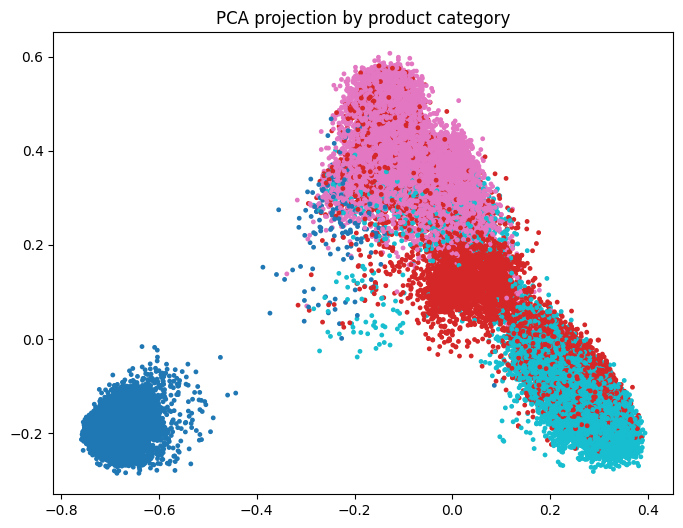

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Your embeddings should be a list of lists/arrays (each 1000-d vector)
embeddings = df_resampled["review_embedding"].tolist()

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(embeddings)

# Convert product categories to numeric codes for coloring
category_codes = df_resampled["predicted_product_category"].astype("category").cat.codes

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=category_codes, cmap="tab10", s=6)
plt.title("PCA projection by product category")
plt.show()

In [4]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df_resampled["review_embedding"].tolist()
labels = df_resampled["predicted_product_category"]

sil = silhouette_score(X, labels)
ch  = calinski_harabasz_score(X, labels)
db  = davies_bouldin_score(X, labels)
print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.14647915950029447
Calinski-Harabasz: 10664.852887017936
Davies-Bouldin: 2.959817325613001
